In [97]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from surprise import SVD
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

rating = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\train.csv")
rating

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
5,5782_14,5782,14,-1.781
6,34059_62,34059,62,6.250
7,1159_9,1159,9,-2.906
8,17736_32,17736,32,-5.750
9,22626_22,22626,22,1.656


In [98]:
jokes = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\jokes.csv")
jokes

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...
5,6,Q. What is orange and sounds like a parrot? A....
6,7,How many men does it take to screw in a light ...
7,8,A dog walks into Western Union and asks the cl...
8,9,Q: If a person who speaks three languages is c...
9,10,What's the difference between a Macintosh and ...


In [99]:
data = pd.merge(rating, jokes, how = 'inner', on = 'joke_id')
data

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."
5,34776_110,34776,110,-7.250,"Judy was having trouble with her computer, so ..."
6,37166_110,37166,110,-8.938,"Judy was having trouble with her computer, so ..."
7,9126_110,9126,110,9.906,"Judy was having trouble with her computer, so ..."
8,26221_110,26221,110,5.625,"Judy was having trouble with her computer, so ..."
9,19258_110,19258,110,-5.594,"Judy was having trouble with her computer, so ..."


[]

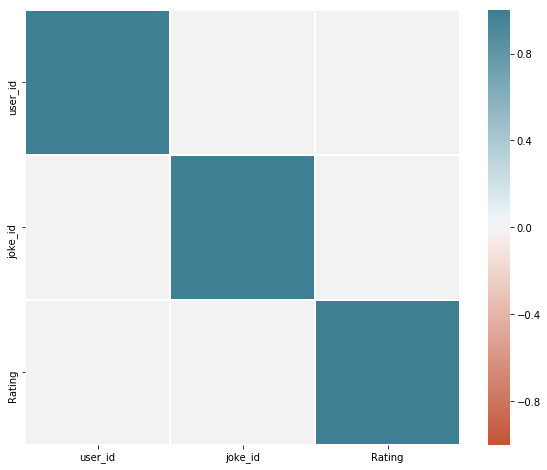

In [105]:
corr = data.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr>0.9, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [49]:
gle = LabelEncoder()
joke_text_dummies = gle.fit_transform(data['joke_text'])
joke_text_df = pd.DataFrame(joke_text_dummies, columns = ['joke_text_df'])
joke_text_df

,joke_text_df
0,76
1,76
2,76
3,76
4,76
5,76
6,76
7,76
8,76
9,76


In [50]:
X = pd.concat([data, joke_text_df], axis=1)
X = data.drop(['joke_text', 'id', 'Rating'], axis = 1)
X

,user_id,joke_id
0,31030,110
1,9137,110
2,27649,110
3,35355,110
4,5478,110
5,34776,110
6,37166,110
7,9126,110
8,26221,110
9,19258,110


In [51]:
y = pd.DataFrame(data['Rating'], columns = ['Rating'])
y

,Rating
0,2.750
1,1.719
2,5.031
3,3.031
4,3.094
5,-7.250
6,-8.938
7,9.906
8,5.625
9,-5.594


In [52]:
test_size = 0.3
seed = 3
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = test_size, random_state = seed)

In [53]:
classifiers = [
    LinearRegression(),
    LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=20)]

In [54]:
for item in classifiers:
    clf = item
    clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_valid)
    rmse = math.sqrt(mean_squared_error(clf_pred, y_valid))
    print('Root mean square error ', rmse)

Root mean square error  5.1616095530777395
Root mean square error  4.996519262195697


In [73]:
estimator = LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 1],
    'n_estimators': [20, 40]
}

In [74]:
gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'n_estimators': [20, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [75]:
gbm_pred = gbm.predict(X_valid)
rmse = math.sqrt(mean_squared_error(gbm_pred, y_valid))
print('Root mean square error ', rmse)

Root mean square error  4.955233042485079


In [95]:
test_data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\test.csv")
X_test = test_data.drop(['id'], axis = 1)
X_test

,user_id,joke_id
0,6194,11
1,19356,3
2,23426,79
3,40030,3
4,19806,115
5,10487,45
6,19959,8
7,10979,66
8,34886,6
9,4729,103


In [96]:
y_pred = gbm.predict(X_test)
y_pred
subm = pd.DataFrame(y_pred, columns = ['Rating'])
subm.to_csv('submission.csv', index=False)
subm

,Rating
0,3.658840
1,-0.369392
2,3.593330
3,-0.987168
4,2.888399
5,-0.292874
6,-0.141435
7,2.437779
8,-0.886631
9,3.084725
